In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('dataset/reviews/BX-Book-Ratings.csv', sep=';')
books_df = pd.read_csv('dataset/reviews/BX_Books.csv', sep=';')

books_df = books_df.drop(books_df.columns[2:], axis=1)
df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
df = df[df['ISBN'].isin(books_df['ISBN'])]
books_df = books_df[books_df['ISBN'].isin(df['ISBN'])]

In [5]:
df = pd.merge(df, books_df, on='ISBN')
df.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [6]:
df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head()

Book-Title
Mother Goose Rhymes (Golden Little Look-Look Book)                                                                         10.0
Astrology's Special Measurements: How to Expand the Meaning of the Horoscope (Llewellyn's New World Astrology, Book 13)    10.0
Eggs                                                                                                                       10.0
Astronomy (Teach Yourself Educational S.)                                                                                  10.0
The Shipping News                                                                                                          10.0
Name: Book-Rating, dtype: float64

In [7]:
df.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False).head()

Book-Title
Wild Animus                   2502
The Lovely Bones: A Novel     1295
The Da Vinci Code              898
A Painted House                838
The Nanny Diaries: A Novel     828
Name: Book-Rating, dtype: int64

In [8]:
ratings_df = pd.DataFrame(df.groupby('ISBN')['Book-Rating'].mean())
ratings_df.head()

,Book-Rating
ISBN,
0000913154,8.0
0001010565,0.0
0001046438,9.0
0001046713,0.0
000104687X,6.0


In [9]:
ratings_df['num_ratings'] = pd.DataFrame(df.groupby('ISBN')['Book-Rating'].count())
ratings_df.head()

,Book-Rating,num_ratings
ISBN,,
0000913154,8.0,1
0001010565,0.0,2
0001046438,9.0,1
0001046713,0.0,1
000104687X,6.0,1


In [10]:
# A large number of books only have a few ratings
# Filtering them out makes the book_matrix less sparse without much significant loss

ratings_df = ratings_df[ratings_df['num_ratings'] > 100]
len(ratings_df)

717

<Axes: >

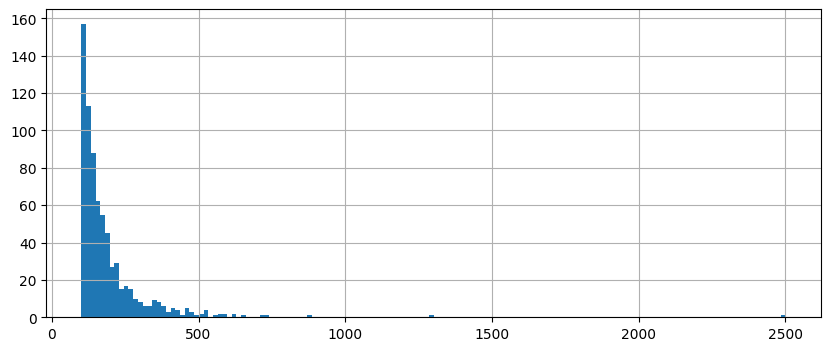

In [11]:
plt.figure(figsize=(10,4))
ratings_df['num_ratings'].hist(bins=150)

<Axes: >

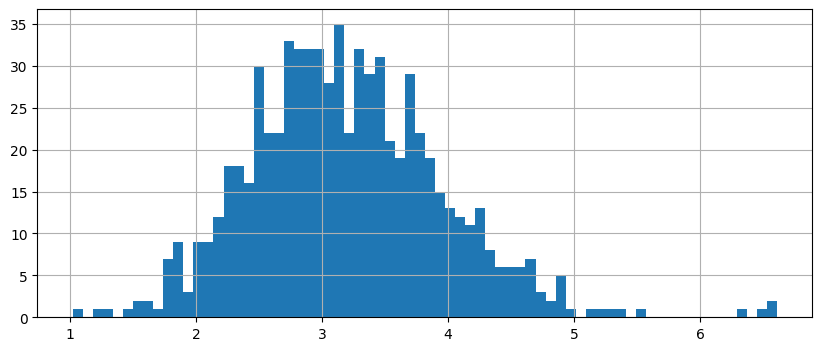

In [12]:
plt.figure(figsize=(10,4))
ratings_df['Book-Rating'].hist(bins=70)

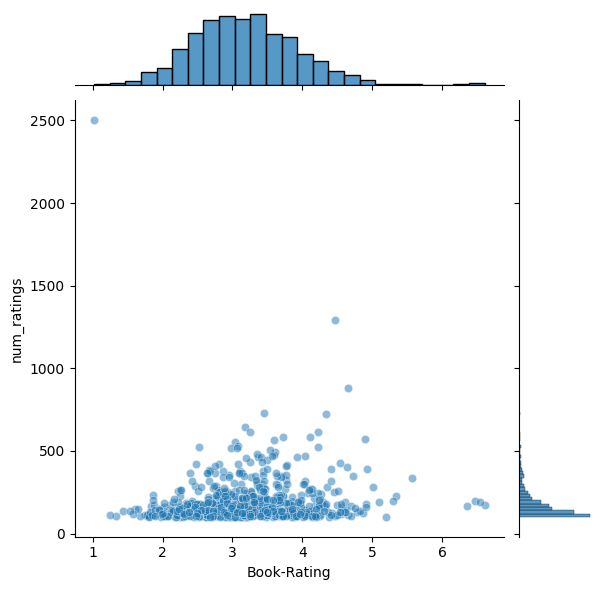

In [13]:
sns.jointplot(x='Book-Rating', y='num_ratings', data=ratings_df,alpha=0.5)

In [14]:
df = df[df['ISBN'].isin(ratings_df.index)]

In [15]:
book_matrix = df.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating')
book_matrix.head()

ISBN,002542730X,0060008032,0060096195,006016848X,0060173289,0060175400,006019491X,0060199652,0060391626,0060392452,...,1558744630,1558745157,1559029838,1573225517,1573225789,1573227331,1573229326,1573229571,1592400876,1878424319
User-ID,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
ratings_df = ratings_df.merge(df[['ISBN', 'Book-Title']].drop_duplicates(), left_index=True, right_on='ISBN')

In [17]:
ratings_df.sort_values('num_ratings',ascending=False).head(10)

,Book-Rating,num_ratings,ISBN,Book-Title
9620,1.019584,2502,0971880107,Wild Animus
6577,4.468726,1295,0316666343,The Lovely Bones: A Novel
7934,4.652322,883,0385504209,The Da Vinci Code
92688,3.448087,732,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel
41012,4.334716,723,0312195516,The Red Tent (Bestselling Backlist)
35518,3.187017,647,044023722X,A Painted House
45780,4.219512,615,0142001740,The Secret Life of Bees
91994,3.255700,614,067976402X,Snow Falling on Cedars
65585,3.718430,586,0671027360,Angels & Demons
93540,4.105983,585,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...


In [18]:
wild_animus_user_ratings = book_matrix['0971880107']
da_vinci_code_user_ratings = book_matrix['0385504209']
wild_animus_user_ratings.head()

User-ID
9     NaN
14    0.0
16    NaN
26    NaN
39    NaN
Name: 0971880107, dtype: float64

In [21]:
lotr1_user_ratings = book_matrix['0618002227']
similar_to_lotr1 = book_matrix.corrwith(lotr1_user_ratings)
corr_lotr1 = pd.DataFrame(similar_to_lotr1, columns=['Correlation'])
corr_lotr1.dropna(inplace=True)
corr_lotr1 = corr_lotr1.merge(df[['ISBN', 'Book-Title']].drop_duplicates(), left_index=True, right_on='ISBN')

corr_lotr1 = corr_lotr1.join(ratings_df['num_ratings'])
corr_lotr1[corr_lotr1['num_ratings'] > 300].sort_values('Correlation', ascending=False).head()

,Book-Rating,num_ratings,ISBN,Book-Title
9620,1.019584,2502,0971880107,Wild Animus
6577,4.468726,1295,0316666343,The Lovely Bones: A Novel
7934,4.652322,883,0385504209,The Da Vinci Code
92688,3.448087,732,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel
41012,4.334716,723,0312195516,The Red Tent (Bestselling Backlist)
35518,3.187017,647,044023722X,A Painted House
45780,4.219512,615,0142001740,The Secret Life of Bees
91994,3.255700,614,067976402X,Snow Falling on Cedars
65585,3.718430,586,0671027360,Angels & Demons
93540,4.105983,585,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...


In [22]:
similar_to_wild_animus = book_matrix.corrwith(wild_animus_user_ratings)
similar_to_da_vinci_code = book_matrix.corrwith(da_vinci_code_user_ratings)

c:\Users\tanwa\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\tanwa\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [23]:
corr_wild_animus = pd.DataFrame(similar_to_wild_animus, columns=['Correlation'])
corr_wild_animus.dropna(inplace=True)

corr_wild_animus = corr_wild_animus.merge(df[['ISBN', 'Book-Title']].drop_duplicates(), left_index=True, right_on='ISBN')

corr_wild_animus.sort_values('Correlation', ascending=False).head(10)

,Correlation,ISBN,Book-Title
9620,1.000000,0971880107,Wild Animus
31421,0.986186,0446609323,Black Friday
106652,0.740110,0446611778,Last Man Standing
57084,0.725213,0446607193,Unspeakable
105880,0.698777,0345386108,Winter Moon
151589,0.691021,0446604844,Total Control
334905,0.690228,0345427637,The Angel of Darkness
75169,0.663212,0316777722,Me Talk Pretty One Day
27172,0.638877,0553580930,A Man in Full
395097,0.630637,0451204530,Code to Zero


In [24]:
corr_wild_animus = corr_wild_animus.join(ratings_df['num_ratings'])
corr_wild_animus.head()

,Correlation,ISBN,Book-Title,num_ratings
6274,0.134356,002542730X,Politically Correct Bedtime Stories: Modern Ta...,171
447649,0.283157,0060008032,Angels,104
3123,-0.104462,0060096195,The Boy Next Door,107
132511,0.049189,006016848X,"Men Are from Mars, Women Are from Venus: A Pra...",147
39500,-0.245898,0060173289,Divine Secrets of the Ya-Ya Sisterhood : A Novel,130


In [25]:
corr_wild_animus[corr_wild_animus['num_ratings'] > 75].sort_values('Correlation', ascending=False).head()

,Correlation,ISBN,Book-Title,num_ratings
9620,1.000000,0971880107,Wild Animus,2502
31421,0.986186,0446609323,Black Friday,111
106652,0.740110,0446611778,Last Man Standing,125
57084,0.725213,0446607193,Unspeakable,107
105880,0.698777,0345386108,Winter Moon,127


In [26]:
corr_davinci_code = pd.DataFrame(similar_to_da_vinci_code, columns=['Correlation'])
corr_davinci_code.dropna(inplace=True)
corr_davinci_code = corr_davinci_code.merge(df[['ISBN', 'Book-Title']].drop_duplicates(), left_index=True, right_on='ISBN')

corr_davinci_code = corr_davinci_code.join(ratings_df['num_ratings'])
corr_davinci_code[corr_davinci_code['num_ratings'] > 75].sort_values('Correlation', ascending=False).head()

,Correlation,ISBN,Book-Title,num_ratings
9620,1.000000,0971880107,Wild Animus,2502
31421,0.986186,0446609323,Black Friday,111
106652,0.740110,0446611778,Last Man Standing,125
57084,0.725213,0446607193,Unspeakable,107
105880,0.698777,0345386108,Winter Moon,127
